# How to get data used for film calibration

The next code shows how to get film response, fit coefficients, mean and std of pixel values in a region of interest.

Note: This code works with Dosepy version 0.7.0

In [24]:
from Dosepy.image import load

In [30]:
# Handle the .tif image

path_to_file = "/home/luis/Documents/GitHub/dpv6/image.tif"
cal_image = load(path_to_file, for_calib = True)

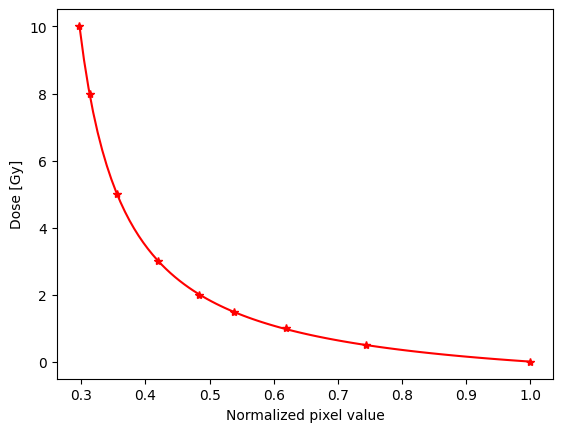

<Axes: xlabel='Normalized pixel value', ylabel='Dose [Gy]'>

In [26]:
# Create the calibration object. Use the red channel and ROIs of 16 mm x 8 mm.

imparted_doses = [0, 0.5, 1, 1.5, 2, 3, 5, 8, 10]

cal = cal_image.get_calibration(
    doses = imparted_doses,
    channel = "R", 
    roi = (16, 8),
    func = "RF"
    )

# Plot the curve
cal.plot()

In [33]:
# Show film response (x = I0/I), where I0 and I are the mean 
# pixel value of the unirradiated and irradiated film, respectively.

cal.x

[np.float64(1.0),
 np.float64(0.7442201162843932),
 np.float64(0.6183445497413359),
 np.float64(0.5386851622945567),
 np.float64(0.48411390376779745),
 np.float64(0.4201803781531841),
 np.float64(0.355148102366891),
 np.float64(0.3132124708144486),
 np.float64(0.29712035892505606)]

In [28]:
# Show the fit coeficients, a, b and c of the fit function (y= -c + b/(x-a)) 

cal.popt

array([0.22710783, 0.77046506, 0.9874817 ])

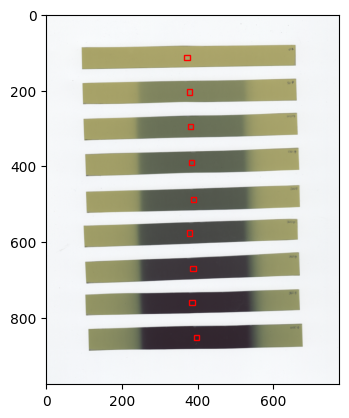

([43695, 32435, 26940, 23485, 21061, 18302, 15507, 13686, 12991],
 [150, 161, 162, 109, 125, 119, 115, 109, 156])

In [29]:
# Show roi and mean pixel values

cal_image.get_stat(ch="r", roi=(5, 5), show=True)